C:\Users\megha\AppData\Local\Temp\ipykernel_2580\3237032187.py:32: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "base_model": MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3)),


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 668s 410ms/step - accuracy: 0.3739 - loss: 1.8261 - val_accuracy: 0.5150 - val_loss: 1.4133
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 518s 331ms/step - accuracy: 0.5364 - loss: 1.3642 - val_accuracy: 0.5476 - val_loss: 1.3114
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 443s 283ms/step - accuracy: 0.5589 - loss: 1.2841 - val_accuracy: 0.5558 - val_loss: 1.2749
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 252s 155ms/step - accuracy: 0.1868 - loss: 2.2155 - val_accuracy: 0.2658 - val_loss: 2.0062
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 356s 228ms/step - accuracy: 0.2834 - loss: 1.9851 - val_accuracy: 0.3201 - val_loss: 1.9146
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 373s 239ms/step - accuracy: 0.3124 - loss: 1.9144 - val_accuracy: 0.3067 - val_loss: 1.9129
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 66ms/step - accuracy: 0.1977 - loss: 2.2040 - val_accuracy: 0.2884 - val_loss: 1.9837
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.

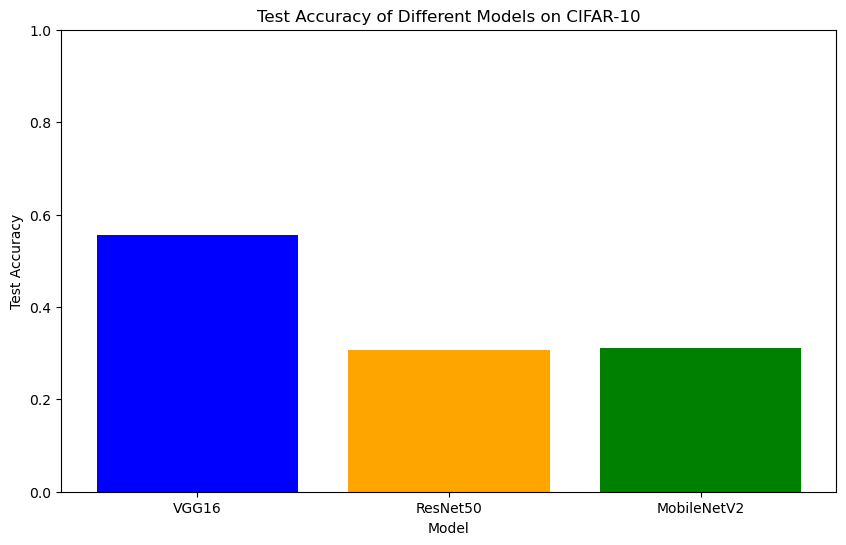

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define model architectures
models = {
    "VGG16": {
        "base_model": VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3)),
        "history": None
    },
    "ResNet50": {
        "base_model": ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3)),
        "history": None
    },
    "MobileNetV2": {
        "base_model": MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3)),
        "history": None
    }
}

# Train and evaluate models
for model_name, model_data in models.items():
    base_model = model_data["base_model"]
    for layer in base_model.layers:
        layer.trainable = False
    
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))
    
    models[model_name]["history"] = history

# Plot bar graph
plt.figure(figsize=(10, 6))
test_accuracies = [models[model_name]["history"].history['val_accuracy'][-1] for model_name in models]
plt.bar(models.keys(), test_accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models on CIFAR-10')
plt.ylim(0, 1)
plt.show()
